<a href="https://colab.research.google.com/github/NATASHASAINI/Machine-Engineering_unsupervisedlearning/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/customer_data.csv")
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score
0,1,5.993428,55.789308,5,8.485273
1,2,4.723471,44.433809,2,3.457637
2,3,6.295377,66.690239,5,5.662709
3,4,8.046060,83.512448,3,3.688530
4,5,4.531693,45.212425,6,9.466113


In [ ]:
from sklearn.preprocessing import StandardScaler

features =['Purchase_Frequency',	'Spend',	'Monthly_Visits',	'Loyalty_Score']
X =data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.52707362,  0.31305492,  1.13872582,  1.10285352],
       [-0.1361383 , -0.27020561, -0.55524647, -0.83292549],
       [ 0.68476088,  0.87296714,  1.13872582,  0.01608809],
       ...,
       [ 0.32923692,  0.08001079,  0.57406839, -0.95641775],
       [ 0.85727868,  0.7366241 , -0.55524647, -0.00371577],
       [ 0.66589818,  0.75939379, -1.68456133, -1.41801895]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Corrected method name
    wcss.append(kmeans.inertia_)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

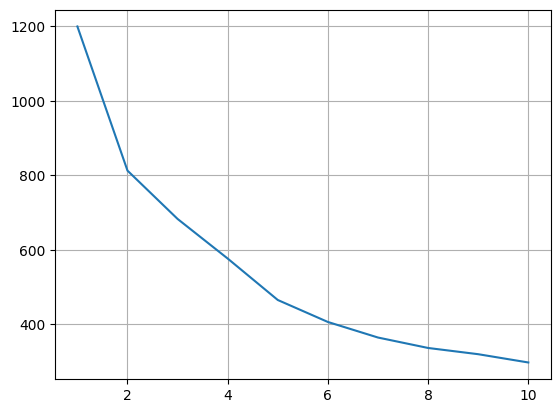

In [ ]:
plt.plot(K_range, wcss)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
# Assign cluster labels to the DataFrame
data['KMEANS_cluster'] = kmeans_labels
# Display the first few rows
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMEANS_cluster
0,1,5.993428,55.789308,5,8.485273,3
1,2,4.723471,44.433809,2,3.457637,2
2,3,6.295377,66.690239,5,5.662709,1
3,4,8.046060,83.512448,3,3.688530,1
4,5,4.531693,45.212425,6,9.466113,0


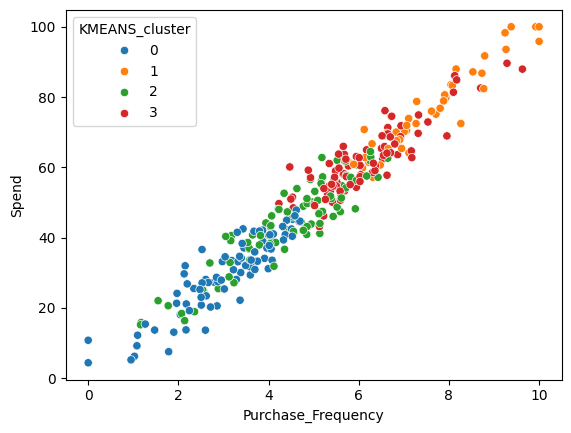

In [ ]:
sns.scatterplot(x='Purchase_Frequency', y='Spend', hue='KMEANS_cluster', data=data, palette='tab10')
plt.show()

hierrchial clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

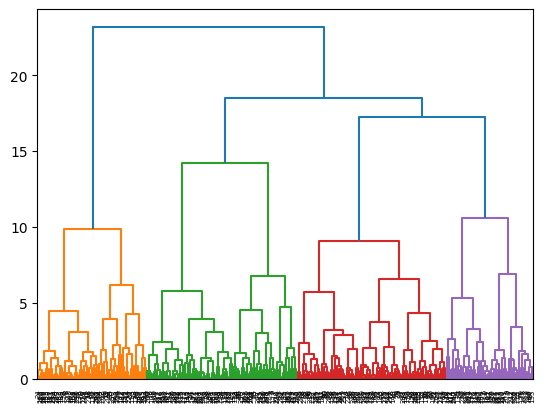

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.show()


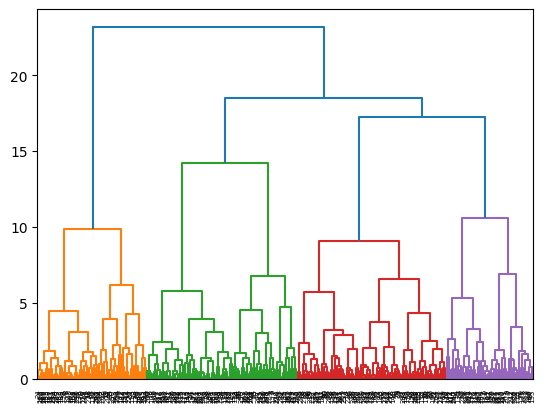

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage=linkage(X_scaled, method='ward')
dendrogram(linked)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_scaled)
data['Hierachial Clustering'] = agg_labels
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMEANS_cluster,Hierachial Clustering
0,1,5.993428,55.789308,5,8.485273,3,2
1,2,4.723471,44.433809,2,3.457637,2,3
2,3,6.295377,66.690239,5,5.662709,1,2
3,4,8.046060,83.512448,3,3.688530,1,0
4,5,4.531693,45.212425,6,9.466113,0,2


In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=43)
gmm_labels = gmm.fit_predict(X_scaled)
data['GMM_CLUSTER'] = gmm_labels
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMEANS_cluster,Hierachial Clustering,GMM_CLUSTER
0,1,5.993428,55.789308,5,8.485273,3,2,3
1,2,4.723471,44.433809,2,3.457637,2,3,2
2,3,6.295377,66.690239,5,5.662709,1,2,3
3,4,8.046060,83.512448,3,3.688530,1,0,0
4,5,4.531693,45.212425,6,9.466113,0,2,3


SILHOUTTE SCORE



In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print('KMEANS:',silhouette_score(X_scaled, kmeans_labels))
print('Hierarchial:',silhouette_score(X_scaled, agg_labels))
print('GMM:',silhouette_score(X_scaled, gmm_labels))


KMEANS: 0.24496069519902577
Hierarchial: 0.2164449289918176
GMM: 0.2314932259060641


KMEANS IS BEST -High the score is better

In [ ]:
print('KMEANS:', silhouette_score(X_scaled, kmeans_labels))
print('Hierarchial:', silhouette_score(X_scaled, agg_labels))
print('GMM:', silhouette_score(X_scaled, gmm_labels))

KMEANS: 0.24496069519902577
Hierarchial: 0.2164449289918176
GMM: 0.2314932259060641


DAVIES_SCORE -GMM IS BEST Low the score is better**

In [ ]:
print('KMEANS:', davies_bouldin_score(X_scaled, kmeans_labels))
print('Hierarchial:', davies_bouldin_score(X_scaled, agg_labels))
print('GMM:', davies_bouldin_score(X_scaled, gmm_labels))

KMEANS: 1.2945080284475377
Hierarchial: 1.3173511701168843
GMM: 1.2208607598218242


In [ ]:
from sklearn.preprocessing import StandardScaler

features =['Purchase_Frequency',	'Spend',	'Monthly_Visits',	'Loyalty_Score']
X =data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.52707362,  0.31305492,  1.13872582,  1.10285352],
       [-0.1361383 , -0.27020561, -0.55524647, -0.83292549],
       [ 0.68476088,  0.87296714,  1.13872582,  0.01608809],
       ...,
       [ 0.32923692,  0.08001079,  0.57406839, -0.95641775],
       [ 0.85727868,  0.7366241 , -0.55524647, -0.00371577],
       [ 0.66589818,  0.75939379, -1.68456133, -1.41801895]])

In [ ]:
#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

In [ ]:
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['dbscanCLUSTER'] = dbscan_labels
data.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMEANS_cluster,Hierachial Clustering,GMM_CLUSTER,dbscanCLUSTER
0,1,5.993428,55.789308,5,8.485273,3,2,3,0
1,2,4.723471,44.433809,2,3.457637,2,3,2,0
2,3,6.295377,66.690239,5,5.662709,1,2,3,0
3,4,8.046060,83.512448,3,3.688530,1,0,0,0
4,5,4.531693,45.212425,6,9.466113,0,2,3,0


In [ ]:
dbscan_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print('DBSCAN:', davies_bouldin_score(X_scaled, gmm_labels))
print('DBSCAN:', silhouette_score(X_scaled, gmm_labels))

DBSCAN: 1.2208607598218242
DBSCAN: 0.2314932259060641
